# Fanni Kiss & Attila Serfőző - Python Term Project

In [3]:
import pandas as pd
import requests
import json
import seaborn as sns

### Importing the enriched data set from our GitHub repo

- HDRO data: Human Development Report Office Statistical Data API
- CPI data: Transparency International - Corruption Perception Index (CPI)

In [4]:
HDRO_data = pd.read_csv('https://raw.githubusercontent.com/ASerfozo/CEU_Python/main/data/HDRO_data.csv')
HDRO_data.head()
for col in HDRO_data.columns:
    print(col)

ISO3
Employment_ratio-2016
Employment_ratio-2019
GDP_per_capita-2016
GDP_per_capita-2019
HDI_index-2016
HDI_index-2019
Women_in_parliament_(%)-2016
Women_in_parliament_(%)-2019


In [5]:
CDI_data = pd.read_csv('https://raw.githubusercontent.com/ASerfozo/CEU_Python/main/data/CPI_2020.csv')
CDI_data.head()
for col in CDI_data.columns:
    print(col)

Country
ISO3
Region
CPI score 2020
Rank 2020
Sources 2020
Standard error 2020
CPI score 2019
Rank 2019
Sources 2019
Standard error 2019
CPI score 2018
Rank 2018
Sources 2018
Standard error 2018
CPI score 2017
Rank 2017
Sources 2017
Standard error 2017
CPI score 2016
Rank 2016
Sources 2016
Standard error 2016
CPI score 2015
Sources 2015
Standard error 2015
CPI score 2014
Sources 2014
Standard error 2014
CPI Score 2013
Sources 2013
Standard error 2013
CPI Score 2012
Sources 2012
Standard error 2012


Keep only the 2020, 2019 and 2016 CPI data

In [6]:

CDI_data = CDI_data[['Country','ISO3','Region','CPI score 2020','Rank 2020','CPI score 2019','Rank 2019','CPI score 2016','Rank 2016']]

### Merging HDI and CPI dataframes

In [7]:
df1 = pd.merge(CDI_data, HDRO_data, how = 'inner')
for col in df1.columns:
    print(col)

Country
ISO3
Region
CPI score 2020
Rank 2020
CPI score 2019
Rank 2019
CPI score 2016
Rank 2016
Employment_ratio-2016
Employment_ratio-2019
GDP_per_capita-2016
GDP_per_capita-2019
HDI_index-2016
HDI_index-2019
Women_in_parliament_(%)-2016
Women_in_parliament_(%)-2019


### Exploratory Data Analysis

#### Regions

AME   - Americas     
AP    - Asia Pacific    
ECA   - Eastern Europe & Central Asia       
MENA  - Middle East & North Africa     
SSA   - Sub-Saharan Africa        
WE/EU - Western Europe & EU  

Western Europe and the EU perform best overall in the corruption perception index, while East-Europe together with Central Asia  (Turkic countries) is still far from the Western Europe levels. It is also important to notice the large variance in the Asia Pacific and the Americas regions CPI index. In case of Americas the main reason behind is the corruption in South-America compared to the North, while in Asia Pacific the wide variety of political systems cause the difference.

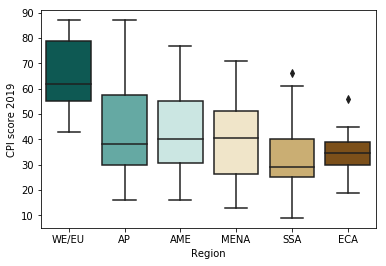

In [8]:
sns.boxplot(data=df1, x = 'Region', y = 'CPI score 2019', palette=("#01665e","#5ab4ac","#c7eae5","#f6e8c3","#d8b365","#8c510a"))

Looking at the Development Index the eye-cathing is the lag of Sub-Saharan Africa compared to the rest of the world.

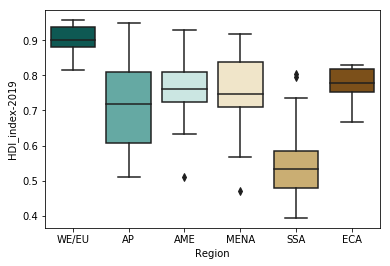

In [9]:
sns.boxplot(data=df1, x = 'Region', y = 'HDI_index-2019', palette=("#01665e","#5ab4ac","#c7eae5","#f6e8c3","#d8b365","#8c510a"))

In [10]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

In [11]:
p = figure(plot_width=800, plot_height=600, title = 'Human Development Index vs Corruption Perception Index 2019')

weeu = df1[df1['Region']=='WE/EU']
source = ColumnDataSource(weeu)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#01665e', alpha=0.8, legend_label='WE/EU',
          muted_color='#01665e', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

ap = df1[df1['Region']=='AP']
source = ColumnDataSource(ap)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#5ab4ac', alpha=0.8, legend_label='AP',
          muted_color='#5ab4ac', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

ame = df1[df1['Region']=='AME']
source = ColumnDataSource(ame)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#c7eae5', alpha=0.8, legend_label='AME',
          muted_color='#c7eae5', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

mena = df1[df1['Region']=='MENA']
source = ColumnDataSource(mena)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#f6e8c3', alpha=0.8, legend_label='MENA',
          muted_color='#f6e8c3', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

ssa = df1[df1['Region']=='SSA']
source = ColumnDataSource(ssa)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#d8b365', alpha=0.8, legend_label='SSA',
          muted_color='#d8b365', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

eca = df1[df1['Region']=='ECA']
source = ColumnDataSource(eca)

p.scatter(x='CPI score 2019',
          y='HDI_index-2019',
          color='#8c510a', alpha=0.8, legend_label='ECA',
          muted_color='#8c510a', muted_alpha=0.2,
          marker='circle', size=10,
          source = source)

hover = HoverTool(tooltips=[("region", "@Region"),
                            ('country', '@Country')])
p.add_tools(hover)

p.legend.location = "top_left"
p.xaxis.axis_label = 'CPI index'
p.yaxis.axis_label = 'HDI index'
p.legend.click_policy="mute"

show(p)

AttributeError: unexpected attribute 'legend_label' to Circle, possible attributes are angle, angle_units, fill_alpha, fill_color, js_event_callbacks, js_property_callbacks, line_alpha, line_cap, line_color, line_dash, line_dash_offset, line_join, line_width, name, radius, radius_dimension, radius_units, size, subscribed_events, tags, x or y

## Task 1
In task 1, we would like to explore the relationship between corruption and the Human Development Index. Firstly, we check the correlation between HDI and the CPI score 2020.

In [12]:
df1['CPI score 2019'].corr(df1['HDI_index-2019'])

0.7567983382062069

The correlation between HDI and corruption score in 2020 is 0.76, which indicates that the two attributes of a given country are moving together.

In [13]:
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [15]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
import seaborn as sns
sns.set(style="ticks")

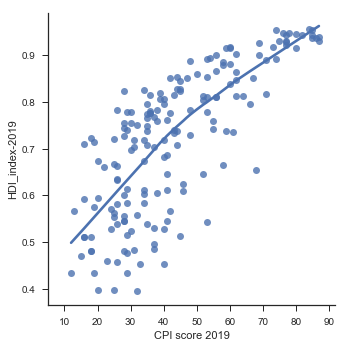

In [17]:
sns.lmplot(x="CPI score 2019", y="HDI_index-2019", data=df1, lowess = True, palette="muted")

If CPI score is increasing (curruption is decreasing), HDI is increasing too. Over a given point (somewhere around CPI=40), the higher corruption score results less higher HDI on average.

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

For further analysis, we check if we have missing values in CPI score or HDI. We do have missing values in HDI so we drop those observations.

In [19]:
df1.isnull().any()

Country                         False
ISO3                            False
Region                          False
CPI score 2020                  False
Rank 2020                       False
CPI score 2019                  False
Rank 2019                       False
CPI score 2016                   True
Rank 2016                        True
Employment_ratio-2016            True
Employment_ratio-2019            True
GDP_per_capita-2016              True
GDP_per_capita-2019              True
HDI_index-2016                   True
HDI_index-2019                   True
Women_in_parliament_(%)-2016     True
Women_in_parliament_(%)-2019     True
dtype: bool

In [20]:
df1 = df1.dropna(subset=['HDI_index-2019','CPI score 2019'])

We set CPI score 2020 as explanatory variable and HDI as dependent variable.

In [21]:
X = df1[["CPI score 2019"]].values
y = df1["HDI_index-2019"].values

Let's see the average value of HDI on the plot below.

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


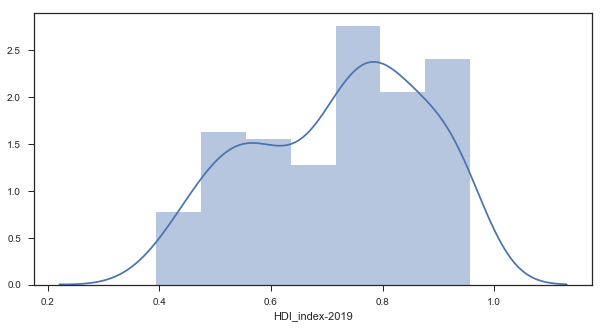

In [22]:
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(df1['HDI_index-2019'])


Next, we split 80% of the data to training set while 20% of the data to test set using below code.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now lets train our model.

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
regressor.coef_, X

(array([0.00635913]), array([[87],
        [87],
        [86],
        [85],
        [85],
        [85],
        [84],
        [82],
        [80],
        [80],
        [77],
        [77],
        [77],
        [76],
        [75],
        [77],
        [78],
        [74],
        [73],
        [74],
        [71],
        [71],
        [69],
        [68],
        [69],
        [67],
        [66],
        [62],
        [64],
        [62],
        [62],
        [62],
        [59],
        [60],
        [60],
        [61],
        [60],
        [60],
        [59],
        [58],
        [56],
        [56],
        [58],
        [58],
        [55],
        [56],
        [55],
        [56],
        [53],
        [52],
        [53],
        [54],
        [52],
        [53],
        [53],
        [52],
        [53],
        [48],
        [50],
        [48],
        [42],
        [47],
        [48],
        [46],
        [45],
        [45],
        [45],
        [44],
        [44],
        [44],

Based on the regression above, we can see that the coefficient is 0.00635913, which means that if the corruption score is increased by 1, the HDI is increased by 0.00635913 on average.

Let's make a prediction based on CPI score 2020 to see, how good predictor corruption is for HDI.

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df_pred1 = df_pred.head(25)

df_pred

,Actual,Predicted
0,0.854,0.779118
1,0.539,0.607421
2,0.625,0.734604
3,0.646,0.772759
4,0.557,0.645576
5,0.496,0.677372
6,0.944,0.963533
7,0.594,0.569267
8,0.824,0.620140
9,0.796,0.696449


Based on the metrics below, corruption can be a meaningful predictor of HDI. 

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08539228748237408
Mean Squared Error: 0.010544943682237006
Root Mean Squared Error: 0.10268857620123577


## Task 2

In [29]:
df1['CPI_Rank_difference'] = df1["Rank 2016"]-df1["Rank 2019"]
df1.sort_values(by=['CPI_Rank_difference'], ascending = False)

,Country,ISO3,Region,CPI score 2020,Rank 2020,CPI score 2019,Rank 2019,CPI score 2016,Rank 2016,Employment_ratio-2016,Employment_ratio-2019,GDP_per_capita-2016,GDP_per_capita-2019,HDI_index-2016,HDI_index-2019,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019,CPI_Rank_difference
101,Gambia,GMB,SSA,37,102,37,96,26.0,145.0,53.679,54.021,2036.872,2206.913,0.475,0.496,9.434,10.345,49.0
60,Armenia,ARM,ECA,49,60,42,77,33.0,113.0,46.097,46.173,11303.072,13653.750,0.766,0.776,10.687,23.485,36.0
80,Argentina,ARG,AME,42,78,45,66,36.0,95.0,55.500,55.301,23189.731,22033.945,0.839,0.845,37.082,39.877,29.0
91,Ecuador,ECU,AME,39,92,38,93,31.0,120.0,65.264,65.338,11551.617,11375.331,0.758,0.759,41.606,37.956,27.0
83,Guyana,GUY,AME,41,83,40,85,34.0,108.0,49.419,49.524,8848.151,9702.579,0.676,0.682,30.435,31.884,23.0
98,Tanzania,TZA,SSA,38,94,37,96,32.0,116.0,82.023,81.761,2441.565,2660.420,0.520,0.529,36.559,36.896,20.0
117,Nepal,NPL,AP,33,117,34,113,29.0,131.0,82.180,82.626,2902.249,3416.791,0.586,0.602,29.580,33.533,18.0
99,Kazakhstan,KAZ,ECA,38,94,34,113,29.0,131.0,66.647,65.601,24210.863,26351.439,0.808,0.825,20.779,22.078,18.0
142,Angola,AGO,SSA,27,142,26,146,18.0,164.0,71.983,72.157,7568.997,6653.908,0.578,0.581,36.818,30.000,18.0
107,Vietnam,VNM,AP,36,104,37,96,33.0,113.0,76.074,75.888,6767.902,8041.179,0.693,0.704,26.721,26.721,17.0


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

Let's see the countries, which managed to jumped forward the most in the CPI ranking from 2016 to 2019.

In [31]:
ranking = df1[["Country", "CPI_Rank_difference"]].sort_values(by=['CPI_Rank_difference'], ascending = False ).reset_index(drop = True).head(10)
ranking

,Country,CPI_Rank_difference
0,Gambia,49.0
1,Armenia,36.0
2,Argentina,29.0
3,Ecuador,27.0
4,Guyana,23.0
5,Tanzania,20.0
6,Nepal,18.0
7,Kazakhstan,18.0
8,Angola,18.0
9,Vietnam,17.0


In [33]:
ranking = ranking.set_index('Country')
ranking

,CPI_Rank_difference
Country,
Gambia,49.0
Armenia,36.0
Argentina,29.0
Ecuador,27.0
Guyana,23.0
Tanzania,20.0
Nepal,18.0
Kazakhstan,18.0
Angola,18.0


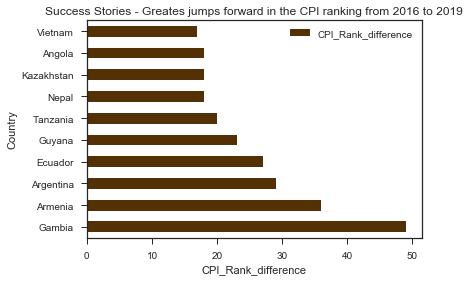

In [34]:
ranking.plot(kind = 'barh', colormap = 'BrBG')

plt.title('Success Stories - Greates jumps forward in the CPI ranking from 2016 to 2019')
plt.ylabel('Country')
plt.xlabel('CPI_Rank_difference')
plt.show()

Let's see some other indicators - what has changed together with the CPI ranking improvement?

In [35]:
df_top = df1[["Country", "CPI_Rank_difference", "Employment_ratio-2016", "Employment_ratio-2019", "GDP_per_capita-2016", "GDP_per_capita-2019", "HDI_index-2016", "HDI_index-2019", "Women_in_parliament_(%)-2016", "Women_in_parliament_(%)-2019"]].sort_values(by=['CPI_Rank_difference'], ascending = False ).reset_index(drop = True).head(10)
df_top

,Country,CPI_Rank_difference,Employment_ratio-2016,Employment_ratio-2019,GDP_per_capita-2016,GDP_per_capita-2019,HDI_index-2016,HDI_index-2019,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019
0,Gambia,49.0,53.679,54.021,2036.872,2206.913,0.475,0.496,9.434,10.345
1,Armenia,36.0,46.097,46.173,11303.072,13653.750,0.766,0.776,10.687,23.485
2,Argentina,29.0,55.500,55.301,23189.731,22033.945,0.839,0.845,37.082,39.877
3,Ecuador,27.0,65.264,65.338,11551.617,11375.331,0.758,0.759,41.606,37.956
4,Guyana,23.0,49.419,49.524,8848.151,9702.579,0.676,0.682,30.435,31.884
5,Tanzania,20.0,82.023,81.761,2441.565,2660.420,0.520,0.529,36.559,36.896
6,Nepal,18.0,82.180,82.626,2902.249,3416.791,0.586,0.602,29.580,33.533
7,Kazakhstan,18.0,66.647,65.601,24210.863,26351.439,0.808,0.825,20.779,22.078
8,Angola,18.0,71.983,72.157,7568.997,6653.908,0.578,0.581,36.818,30.000
9,Vietnam,17.0,76.074,75.888,6767.902,8041.179,0.693,0.704,26.721,26.721


In [36]:
df_top = df_top.set_index('Country')
df_top

,CPI_Rank_difference,Employment_ratio-2016,Employment_ratio-2019,GDP_per_capita-2016,GDP_per_capita-2019,HDI_index-2016,HDI_index-2019,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019
Country,,,,,,,,,
Gambia,49.0,53.679,54.021,2036.872,2206.913,0.475,0.496,9.434,10.345
Armenia,36.0,46.097,46.173,11303.072,13653.750,0.766,0.776,10.687,23.485
Argentina,29.0,55.500,55.301,23189.731,22033.945,0.839,0.845,37.082,39.877
Ecuador,27.0,65.264,65.338,11551.617,11375.331,0.758,0.759,41.606,37.956
Guyana,23.0,49.419,49.524,8848.151,9702.579,0.676,0.682,30.435,31.884
Tanzania,20.0,82.023,81.761,2441.565,2660.420,0.520,0.529,36.559,36.896
Nepal,18.0,82.180,82.626,2902.249,3416.791,0.586,0.602,29.580,33.533
Kazakhstan,18.0,66.647,65.601,24210.863,26351.439,0.808,0.825,20.779,22.078
Angola,18.0,71.983,72.157,7568.997,6653.908,0.578,0.581,36.818,30.000


In [37]:
df_top_emp = df_top[["Employment_ratio-2016", "Employment_ratio-2019"]]
df_top_emp

,Employment_ratio-2016,Employment_ratio-2019
Country,,
Gambia,53.679,54.021
Armenia,46.097,46.173
Argentina,55.500,55.301
Ecuador,65.264,65.338
Guyana,49.419,49.524
Tanzania,82.023,81.761
Nepal,82.180,82.626
Kazakhstan,66.647,65.601
Angola,71.983,72.157


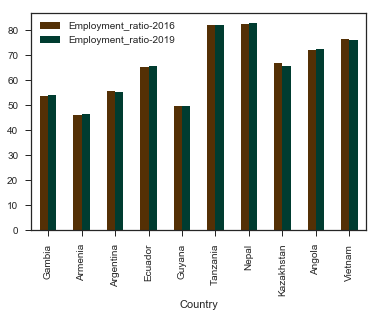

In [38]:
df_top_emp.plot.bar(colormap = 'BrBG')

In [39]:
df_top_gdp = df_top[["GDP_per_capita-2016", "GDP_per_capita-2019"]]
df_top_gdp

,GDP_per_capita-2016,GDP_per_capita-2019
Country,,
Gambia,2036.872,2206.913
Armenia,11303.072,13653.750
Argentina,23189.731,22033.945
Ecuador,11551.617,11375.331
Guyana,8848.151,9702.579
Tanzania,2441.565,2660.420
Nepal,2902.249,3416.791
Kazakhstan,24210.863,26351.439
Angola,7568.997,6653.908


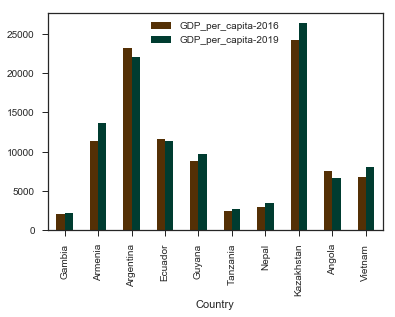

In [40]:
df_top_gdp.plot.bar(colormap = 'BrBG')

In [41]:
df_top_wom = df_top[["Women_in_parliament_(%)-2016", "Women_in_parliament_(%)-2019"]]
df_top_wom

,Women_in_parliament_(%)-2016,Women_in_parliament_(%)-2019
Country,,
Gambia,9.434,10.345
Armenia,10.687,23.485
Argentina,37.082,39.877
Ecuador,41.606,37.956
Guyana,30.435,31.884
Tanzania,36.559,36.896
Nepal,29.580,33.533
Kazakhstan,20.779,22.078
Angola,36.818,30.000


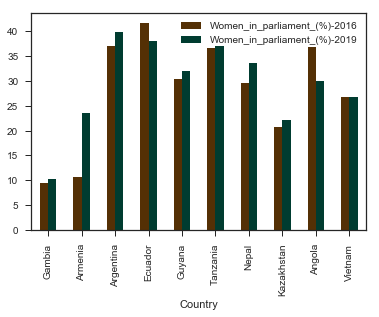

In [42]:
df_top_wom.plot.bar(colormap = 'BrBG')